In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM
from scipy.stats import shapiro
from scipy import stats

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [10]:
direct = '/Volumes/ryanKast/RKDATA/ConfocalData/FV3000/RNAscopeV2/PV488_Gad2555_Pax6647/JAX-HP-F2_2H_20X_Cycle/JPG/'
for file in os.listdir(direct):
    if file.find('.jpg') != -1:
        file1 = file.replace('.tif','')
        file2 = file1.replace('MAX_Stitch_', '2H-')
        os.rename(direct + file, direct + file2)

In [7]:
os.listdir('/Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/GuppyFormatCsvs2-2-24/Day4/JAX-17M-2L/JAX-17M-2L_output_1')

['15uLRewardVolume_TrialInitial3lickbout_FirstLick_bothports.hdf5',
 '15uLRewardVolume_TrialInitial3lickbout_LastLick_bothports.hdf5',
 '25uLRewardVolume_TrialInitial3lickbout_FirstLick_bothports.hdf5',
 '25uLRewardVolume_TrialInitial3lickbout_LastLick_bothports.hdf5',
 '5uLRewardVolume_TrialInitial3lickbout_FirstLick_bothports.hdf5',
 '5uLRewardVolume_TrialInitial3lickbout_LastLick_bothports.hdf5',
 'AllBouts_First_ZI-PRN.hdf5',
 'AllBouts_First_ZI-PRN_baselineUncorrected_dff_ZI-PRN.h5',
 'AllBouts_First_ZI-PRN_baselineUncorrected_z_score_ZI-PRN.h5',
 'AllBouts_First_ZI-PRN_dff_ZI-PRN.h5',
 'AllBouts_First_ZI-PRN_z_score_ZI-PRN.h5',
 'AllBouts_Last_ZI-PRN.hdf5',
 'AllBouts_Last_ZI-PRN_baselineUncorrected_dff_ZI-PRN.h5',
 'AllBouts_Last_ZI-PRN_baselineUncorrected_z_score_ZI-PRN.h5',
 'AllBouts_Last_ZI-PRN_dff_ZI-PRN.h5',
 'AllBouts_Last_ZI-PRN_z_score_ZI-PRN.h5',
 'AllLooms.hdf5',
 'AllLooms_ZI-PRN.hdf5',
 'AllLooms_ZI-PRN_baselineUncorrected_dff_ZI-PRN.h5',
 'AllLooms_ZI-PRN_baselineU

In [8]:
dflist = []
for root, dirs, files in os.walk('/Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/GuppyFormatCsvs2-2-24/Day4/'):
    for file in files:
        if  (file.find('Uncorrected') == -1) & (file.find('peak') != -1) & (root.find('output_1') != -1) & (file.find('Shelter_Freeze') != -1) & (file.find('z_score') != -1) & (file.find('.h5') != -1):
            print(root + file)
            mouse = root.split('/')[-2]
            day = root.split('/')[-3]
            print(mouse, root + '/' + file)
            df = pd.read_hdf(root + '/' + file).reset_index()
            df.insert(0, 'Mouse', mouse)
            df.insert(1, 'Day', day)
            df.insert(2, 'timestamps', df['index'].str.split('_',expand=True)[1])
            dflist.append(df)
            if mouse.find('R') > 0:
                df['CellType'] = 'ZI-SC'
            elif mouse.find('L') > 0:
                df['CellType'] = 'ZI-PRN'
dfFullSet = pd.concat(dflist)
dfFullSet.drop('index', axis = 1, inplace = True)

/Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/GuppyFormatCsvs2-2-24/Day4/JAX-15F-1L/JAX-15F-1L_output_1peak_AUC_Shelter_Freeze_ZI-PRN_z_score_ZI-PRN.h5
JAX-15F-1L /Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/GuppyFormatCsvs2-2-24/Day4/JAX-15F-1L/JAX-15F-1L_output_1/peak_AUC_Shelter_Freeze_ZI-PRN_z_score_ZI-PRN.h5
/Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/GuppyFormatCsvs2-2-24/Day4/JAX-15F-2L/JAX-15F-2L_output_1peak_AUC_Shelter_Freeze_ZI-PRN_z_score_ZI-PRN.h5
JAX-15F-2L /Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/GuppyFormatCsvs2-2-24/Day4/JAX-15F-2L/JAX-15F-2L_output_1/peak_AUC_Shelter_Freeze_ZI-PRN_z_score_ZI-PRN.h5
/Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/GuppyFormatCsvs2-2-24/Day4/JAX-15F-2R/JAX-15F-2R_output_1peak_AUC_Shelter_Freeze_ZI-SC_z_score_ZI-SC.h5
JAX-15F-2R /Volumes/ryanKast

In [9]:
dfFullSet[dfFullSet['timestamps'] =='mean'].sort_values('peak_neg_3')

,Mouse,Day,timestamps,peak_pos_1,peak_neg_1,area_1,peak_pos_2,peak_neg_2,area_2,peak_pos_3,...,peak_pos_5,peak_neg_5,area_5,peak_pos_6,peak_neg_6,area_6,peak_pos_7,peak_neg_7,area_7,CellType
1,JAX-16F-1R,Day4,mean,3.605210,0.091204,134.491806,3.605210,2.796597,64.630226,2.955183,...,2.955183,-3.191705,-1223.943481,2.955183,-0.423037,22.502596,2.955183,-1.418312,1.119864,ZI-SC
3,JAX-16M-1R,Day4,mean,1.162465,-0.560220,3.767952,1.162465,0.404648,16.951424,1.072060,...,1.072060,-2.426318,-967.843872,1.072060,-0.812163,2.546412,1.072060,-1.510703,-21.341522,ZI-SC
4,JAX-16F-2RB,Day4,mean,0.482142,-0.746786,-7.015901,0.482142,-0.118067,6.583265,0.314932,...,0.314932,-1.999296,-1174.833740,0.314932,-1.184147,-10.310452,0.314932,-1.390636,-36.980171,ZI-SC
5,JAX-15F-2R,Day4,mean,-0.060224,-0.408687,-19.926666,-0.060224,-0.408687,-2.838492,-0.448180,...,-0.317160,-1.977052,-1375.299805,-0.448180,-1.364095,-18.514978,-0.448180,-1.673625,-49.356098,ZI-SC
3,JAX-15F-2L,Day4,mean,1.146191,-0.519773,2.811611,1.146191,-0.016139,13.998091,1.008999,...,1.008999,-2.182989,-1347.080811,1.008999,-0.822029,-2.251201,1.008999,-1.214963,-22.376495,ZI-PRN
8,JAX-17M-2R,Day4,mean,1.714120,-0.557169,11.299870,1.714120,-0.428082,14.929525,1.657741,...,1.657741,-2.243938,-2445.134766,1.657741,-0.482802,11.987164,1.657741,-1.159166,-7.076586,ZI-SC
5,JAX-16M-3R,Day4,mean,0.386622,-0.198586,12.065151,0.274352,-0.110409,0.835394,0.320141,...,0.320141,-1.840335,-1866.331787,0.320141,-0.069133,3.390476,0.320141,-0.852314,-7.276787,ZI-SC
4,JAX-16M-2R,Day4,mean,1.761036,-0.612312,18.238115,1.761036,1.434266,31.269421,1.357326,...,1.357326,-1.752971,-829.432373,1.357326,-0.086922,10.536562,1.357326,-0.467661,3.631753,ZI-SC
6,JAX-15F-1L,Day4,mean,1.619214,-0.481671,10.087629,1.619214,0.810433,27.251194,1.177807,...,1.177807,-1.317464,-592.314209,1.177807,-0.128916,6.585348,1.177807,-0.578588,-0.869618,ZI-PRN
14,JAX-16F-1L,Day4,mean,1.865861,-0.395706,-4.205119,1.865861,-0.112348,19.823391,1.856030,...,1.856030,-1.578942,-1355.527588,1.856030,0.339297,21.736839,1.856030,-0.148750,23.335953,ZI-PRN


In [10]:
from scipy.stats import levene

df= dfFullSet[dfFullSet['timestamps'] == 'mean']
var = 'area_3' #define peak_AUC variable you want to compare
lbd = 6    #define the lick bout duration you want to compare
CT = 'ZI-PRN'
CT2= 'ZI-SC'

stat, p = shapiro(df[(df['CellType'] ==CT)][var])
alpha = 0.05

if p > alpha:
    print(var + ' for ' + CT + " looks normally distributed (fail to reject H0)")
else:
    print(var + ' for ' + CT +  " does not look normally distributed (reject H0)")

stat, p = shapiro(df[(df['CellType'] ==CT2)][var])
alpha = 0.05

if p > alpha:
    print(var + ' for ' + CT2 + " looks normally distributed (fail to reject H0)")
else:
    print(var + ' for ' + CT2 +  " does not look normally distributed (reject H0)")
    
lstat, p2 = levene(df[(df['CellType'] == CT)][var],
                   df[(df['CellType'] == CT2)][var])

if p2 > alpha:
    print("Variances of " + var + " are homogeneous (fail to reject H0)")
else:
    print("Variances of " + var + " are not homogeneous (reject H0)")

area_3 for ZI-PRN looks normally distributed (fail to reject H0)
area_3 for ZI-SC looks normally distributed (fail to reject H0)
Variances of area_3 are homogeneous (fail to reject H0)


In [11]:
from scipy.stats import levene

df= dfFullSet[dfFullSet['timestamps'] == 'mean']
var = 'peak_neg_3' #define peak_AUC variable you want to compare
lbd = 6    #define the lick bout duration you want to compare
CT = 'ZI-PRN'
CT2= 'ZI-SC'

stat, p = shapiro(df[(df['CellType'] ==CT)][var])
alpha = 0.05

if p > alpha:
    print(var + ' for ' + CT + " looks normally distributed (fail to reject H0)")
else:
    print(var + ' for ' + CT +  " does not look normally distributed (reject H0)")

stat, p = shapiro(df[(df['CellType'] ==CT2)][var])
alpha = 0.05

if p > alpha:
    print(var + ' for ' + CT2 + " looks normally distributed (fail to reject H0)")
else:
    print(var + ' for ' + CT2 +  " does not look normally distributed (reject H0)")
    
lstat, p2 = levene(df[(df['CellType'] == CT)][var],
                   df[(df['CellType'] == CT2)][var])

if p2 > alpha:
    print("Variances of " + var + " are homogeneous (fail to reject H0)")
else:
    print("Variances of " + var + " are not homogeneous (reject H0)")

peak_neg_3 for ZI-PRN looks normally distributed (fail to reject H0)
peak_neg_3 for ZI-SC looks normally distributed (fail to reject H0)
Variances of peak_neg_3 are homogeneous (fail to reject H0)


Reject null hypothesis: There is a significant difference between the means.
p = 0.017418846191572777


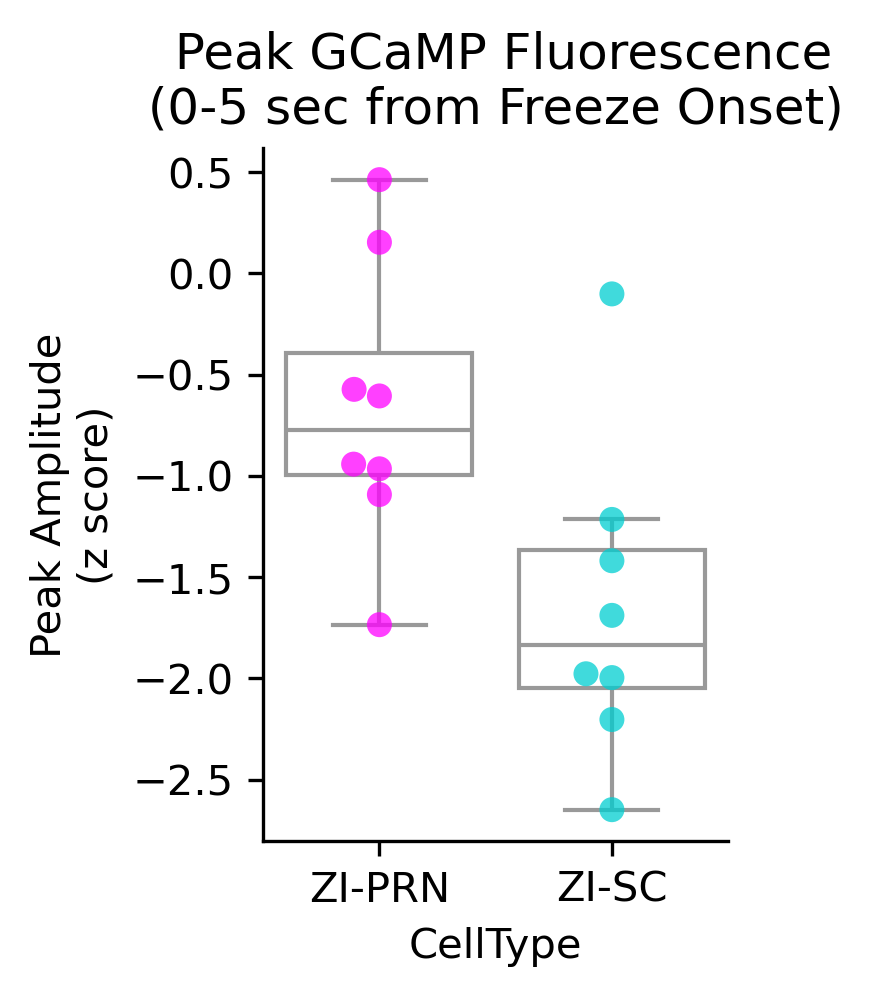

In [19]:
plt.figure(figsize=(2, 3), dpi=300)
var = 'peak_neg_3'
# Bar plot
ax = sns.boxplot(
    data=dfFullSet[dfFullSet['timestamps'] == 'mean'],
    x='CellType',
    y=var,
    color = 'white',
    dodge=False,
    showfliers = False,
)

# Swarm plot
swarm = sns.swarmplot(
    data=dfFullSet[dfFullSet['timestamps'] == 'mean'],
    x='CellType',
    y=var,
    hue='CellType',
    hue_order = ['ZI-PRN', 'ZI-SC'],
    palette=['magenta', 'darkturquoise'],
    dodge=False,
    alpha = 0.75,
    s = 6
)

ax.set(ylabel= 'Peak Amplitude\n(z score)',
       title = ' Peak GCaMP Fluorescence\n(0-5 sec from Freeze Onset)')

# Create a legend for the swarm plot
handles, labels = swarm.get_legend_handles_labels()

plt.legend([],[],
           frameon = False)

sns.despine(top=True, right=True)




#### Run Stats

All_mean_z = dfFullSet[dfFullSet['timestamps'] == 'mean']

t_statistic, p_value = stats.ttest_ind(All_mean_z[All_mean_z['CellType'] == 'ZI-SC'][var],
                                       All_mean_z[All_mean_z['CellType'] == 'ZI-PRN'][var])
# Check if the p-value is less than your chosen significance level (e.g., 0.05)

alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject null hypothesis: There is no significant difference between the means.")

print('p = ' + str(p_value))

#plt.savefig('/Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/PhotometryFigures/zscore_' + var + 'FreezeOnset.png', dpi = 300, bbox_inches = 'tight')
#plt.savefig('/Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/PhotometryFigures/zscore_' + var + 'FreezeOnset.svg', dpi = 300, bbox_inches = 'tight')




Reject null hypothesis: There is a significant difference between the means.
p = 0.01629058315999755


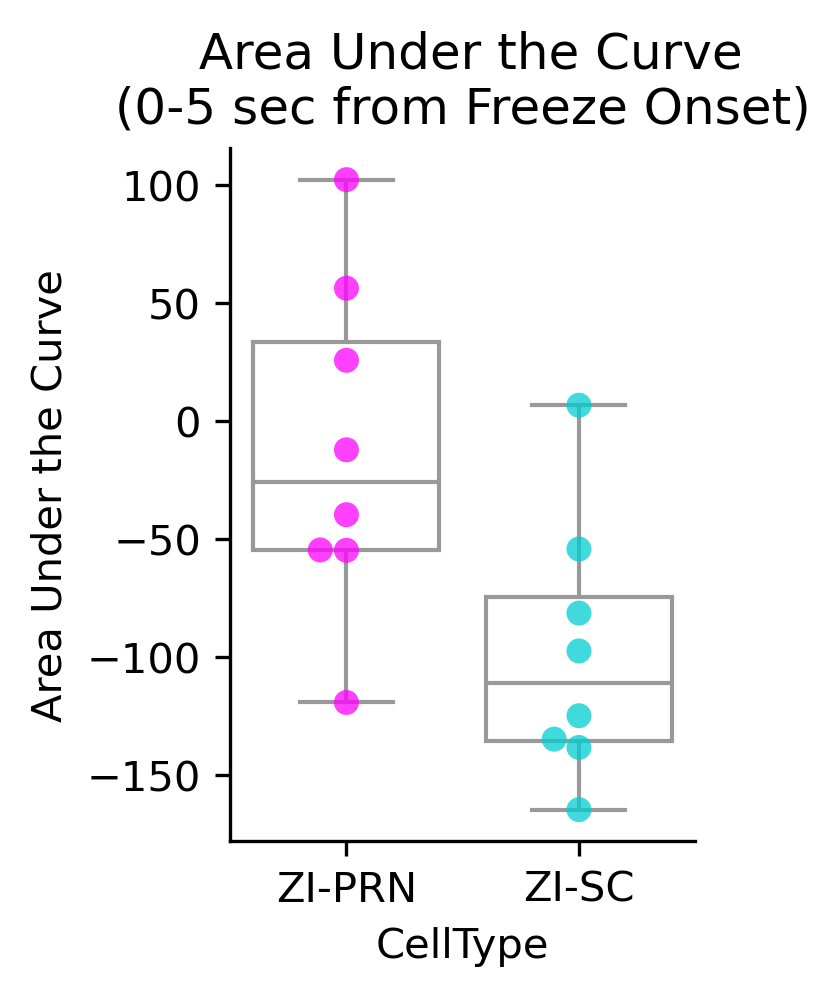

In [18]:
plt.figure(figsize=(2, 3), dpi=300)
var = 'area_3'
# Bar plot
ax = sns.boxplot(
    data=dfFullSet[dfFullSet['timestamps'] == 'mean'],
    x='CellType',
    y=var,
    color = 'white',
    dodge=False,
    showfliers = False,
)

# Swarm plot
swarm = sns.swarmplot(
    data=dfFullSet[dfFullSet['timestamps'] == 'mean'],
    x='CellType',
    y=var,
    hue='CellType',
    hue_order = ['ZI-PRN', 'ZI-SC'],
    palette=['magenta', 'darkturquoise'],
    dodge=False,
    alpha = 0.75,
    s = 6
)

ax.set(ylabel= 'Area Under the Curve',
       title = ' Area Under the Curve\n(0-5 sec from Freeze Onset)')

# Create a legend for the swarm plot
handles, labels = swarm.get_legend_handles_labels()

plt.legend([],[],
           frameon = False)

sns.despine(top=True, right=True)




#### Run Stats

All_mean_z = dfFullSet[dfFullSet['timestamps'] == 'mean']

t_statistic, p_value = stats.ttest_ind(All_mean_z[All_mean_z['CellType'] == 'ZI-SC'][var],
                                       All_mean_z[All_mean_z['CellType'] == 'ZI-PRN'][var])
# Check if the p-value is less than your chosen significance level (e.g., 0.05)

alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject null hypothesis: There is no significant difference between the means.")

print('p = ' + str(p_value))

plt.savefig('/Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/PhotometryFigures/zscore_' + var + '_EscapeOnset.png', dpi = 300, bbox_inches = 'tight')
plt.savefig('/Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/PhotometryFigures/zscore_' + var + '_EscapeOnset.svg', dpi = 300, bbox_inches = 'tight')


In [13]:
from scipy.stats import levene

df= dfFullSet[dfFullSet['timestamps'] == 'mean']
var = 'peak_pos_7' #define peak_AUC variable you want to compare
lbd = 6    #define the lick bout duration you want to compare
CT = 'ZI-PRN'
CT2= 'ZI-SC'

stat, p = shapiro(df[(df['CellType'] ==CT)][var])
alpha = 0.05

if p > alpha:
    print(var + ' for ' + CT + " looks normally distributed (fail to reject H0)")
else:
    print(var + ' for ' + CT +  " does not look normally distributed (reject H0)")

stat, p = shapiro(df[(df['CellType'] ==CT2)][var])
alpha = 0.05

if p > alpha:
    print(var + ' for ' + CT2 + " looks normally distributed (fail to reject H0)")
else:
    print(var + ' for ' + CT2 +  " does not look normally distributed (reject H0)")
    
lstat, p2 = levene(df[(df['CellType'] == CT)][var],
                   df[(df['CellType'] == CT2)][var])

if p2 > alpha:
    print("Variances of " + var + " are homogeneous (fail to reject H0)")
else:
    print("Variances of " + var + " are not homogeneous (reject H0)")

peak_pos_7 for ZI-PRN looks normally distributed (fail to reject H0)
peak_pos_7 for ZI-SC looks normally distributed (fail to reject H0)
Variances of peak_pos_7 are homogeneous (fail to reject H0)


Fail to reject null hypothesis: There is no significant difference between the means.
p = 0.25693379854530485


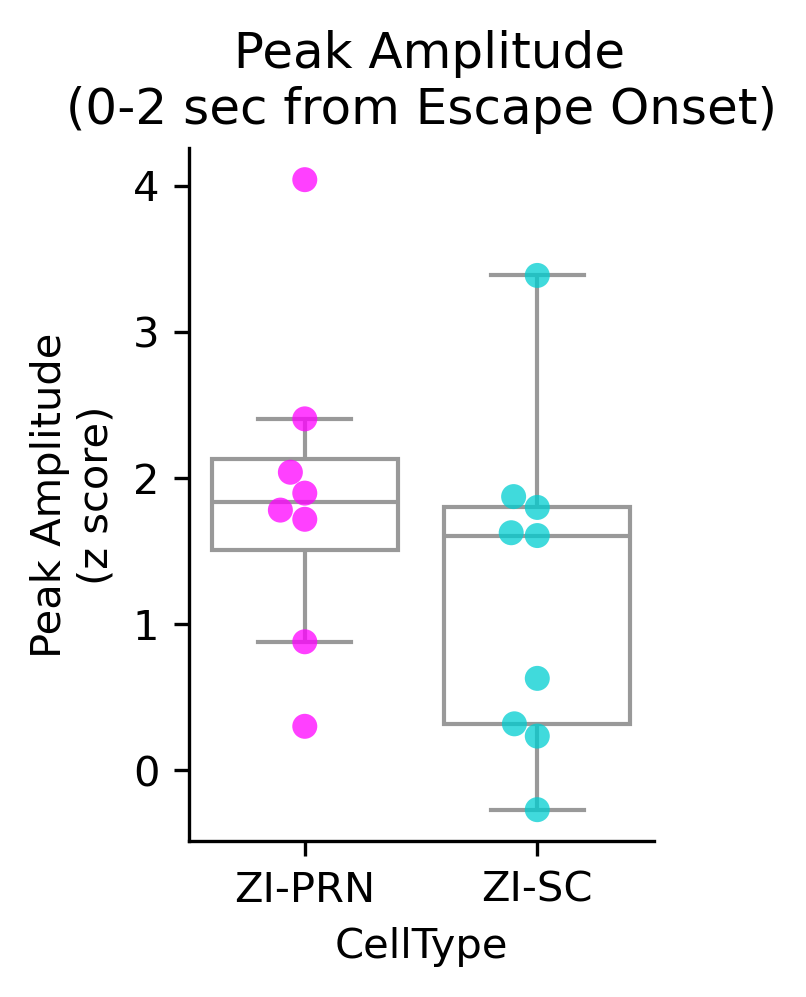

In [14]:
plt.figure(figsize=(2, 3), dpi=300)
var = 'peak_pos_7'
# Bar plot
ax = sns.boxplot(
    data=dfFullSet[dfFullSet['timestamps'] == 'mean'],
    x='CellType',
    y=var,
    color = 'white',
    dodge=False,
    showfliers = False,
)

# Swarm plot
swarm = sns.swarmplot(
    data=dfFullSet[dfFullSet['timestamps'] == 'mean'],
    x='CellType',
    y=var,
    hue='CellType',
    hue_order = ['ZI-PRN', 'ZI-SC'],
    palette=['magenta', 'darkturquoise'],
    dodge=False,
    alpha = 0.75,
    s = 6
)

ax.set(ylabel= 'Peak Amplitude\n(z score)',
       title = ' Peak Amplitude\n(0-2 sec from Escape Onset)')

# Create a legend for the swarm plot
handles, labels = swarm.get_legend_handles_labels()

plt.legend([],[],
           frameon = False)

sns.despine(top=True, right=True)




#### Run Stats

All_mean_z = dfFullSet[dfFullSet['timestamps'] == 'mean']

t_statistic, p_value = stats.ttest_ind(All_mean_z[All_mean_z['CellType'] == 'ZI-SC'][var],
                                       All_mean_z[All_mean_z['CellType'] == 'ZI-PRN'][var])
# Check if the p-value is less than your chosen significance level (e.g., 0.05)

alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject null hypothesis: There is no significant difference between the means.")

print('p = ' + str(p_value))

plt.savefig('/Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/PhotometryFigures/zscore_' + var + '_EscapeOnset.png', dpi = 300, bbox_inches = 'tight')
plt.savefig('/Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/PhotometryFigures/zscore_' + var + '_EscapeOnset.svg', dpi = 300, bbox_inches = 'tight')


In [20]:
from scipy.stats import levene

df= AllBout_zDF[AllBout_zDF['Timestamp'] == 'mean']
var = 'area_2' #define peak_AUC variable you want to compare
lbd = 6    #define the lick bout duration you want to compare

for CT in df['CellType'].unique().tolist():
    stat, p = shapiro(df[(df['CellType'] ==CT)][var])
    alpha = 0.05

    if p > alpha:
        print(var + " of " + CT +  " looks normally distributed (fail to reject H0)")
    else:
        print(var + " of " + CT +  " does not look normally distributed (reject H0)")
    

lstat, p2 = levene(df[(df['CellType'] == CT)][var],
                   df[(df['CellType'] == CT2)][var])

if p2 > alpha:
    print("Variances of " + var + " are homogeneous (fail to reject H0)")
else:
    print("Variances of " + var + "are not homogeneous (reject H0)")

area_2 of ZI-PRN looks normally distributed (fail to reject H0)
area_2 of ZI-SC does not look normally distributed (reject H0)
Variances of area_2 are homogeneous (fail to reject H0)


In [39]:
from scipy.stats import levene

df= AllBout_zDF[AllBout_zDF['Timestamp'] != 'mean']
var = 'area_3' #define peak_AUC variable you want to compare
lbd = 6    #define the lick bout duration you want to compare
CT = 'ZI-PRN'
CT2= 'ZI-SC'


lstat, p2 = levene(df[(df['CellType'] == CT)][var],
                   df[(df['CellType'] == CT2)][var])

alpha = 0.05

if p2 > alpha:
    print("Variances are homogeneous (fail to reject H0)")
else:
    print("Variances are not homogeneous (reject H0)")

stat, p = shapiro(AllBout_zDF[(AllBout_zDF['CellType'] =='ZI-PRN')][var])
alpha = 0.05

if p > alpha:
    print("Data looks normally distributed (fail to reject H0)")
else:
    print("Data does not look normally distributed (reject H0)")

Variances are not homogeneous (reject H0)
Data does not look normally distributed (reject H0)
